In [4]:
!pip install ultralytics==8.0.134 --quite

In [8]:
!nvidia-smi
import os
HOME = os.getcwd()
print(HOME)

Sun Sep 17 08:05:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8                5W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134  Python-3.11.3 torch-2.0.1+cpu CPU
Setup complete  (12 CPUs, 23.4 GB RAM, 341.3/709.4 GB disk)


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [12]:
model = YOLO(f'{HOME}/yolov8n.pt')

In [14]:

if not os.path.exists("datasets"):
    os.makedirs("datasets")

%cd {HOME}/datasets



from roboflow import Roboflow
rf = Roboflow(api_key="rEI0hENSj7HNFi9oboo9")
project = rf.workspace("suren").project("ink-seal-library")
dataset = project.version(2).download("yolov8")


d:\3.projects_by_tech\Python\INK_STAMP_DETECTOR_Machine-Learning_with_trainig-data_and_model\datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ink-Seal-Library-2 in yolov8:: 100%|██████████| 128/128 [00:00<00:00, 1221.10it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


New https://pypi.org/project/ultralytics/8.0.172 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134  Python-3.11.3 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData\datasets\Ink-Stamp-detector-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, au

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


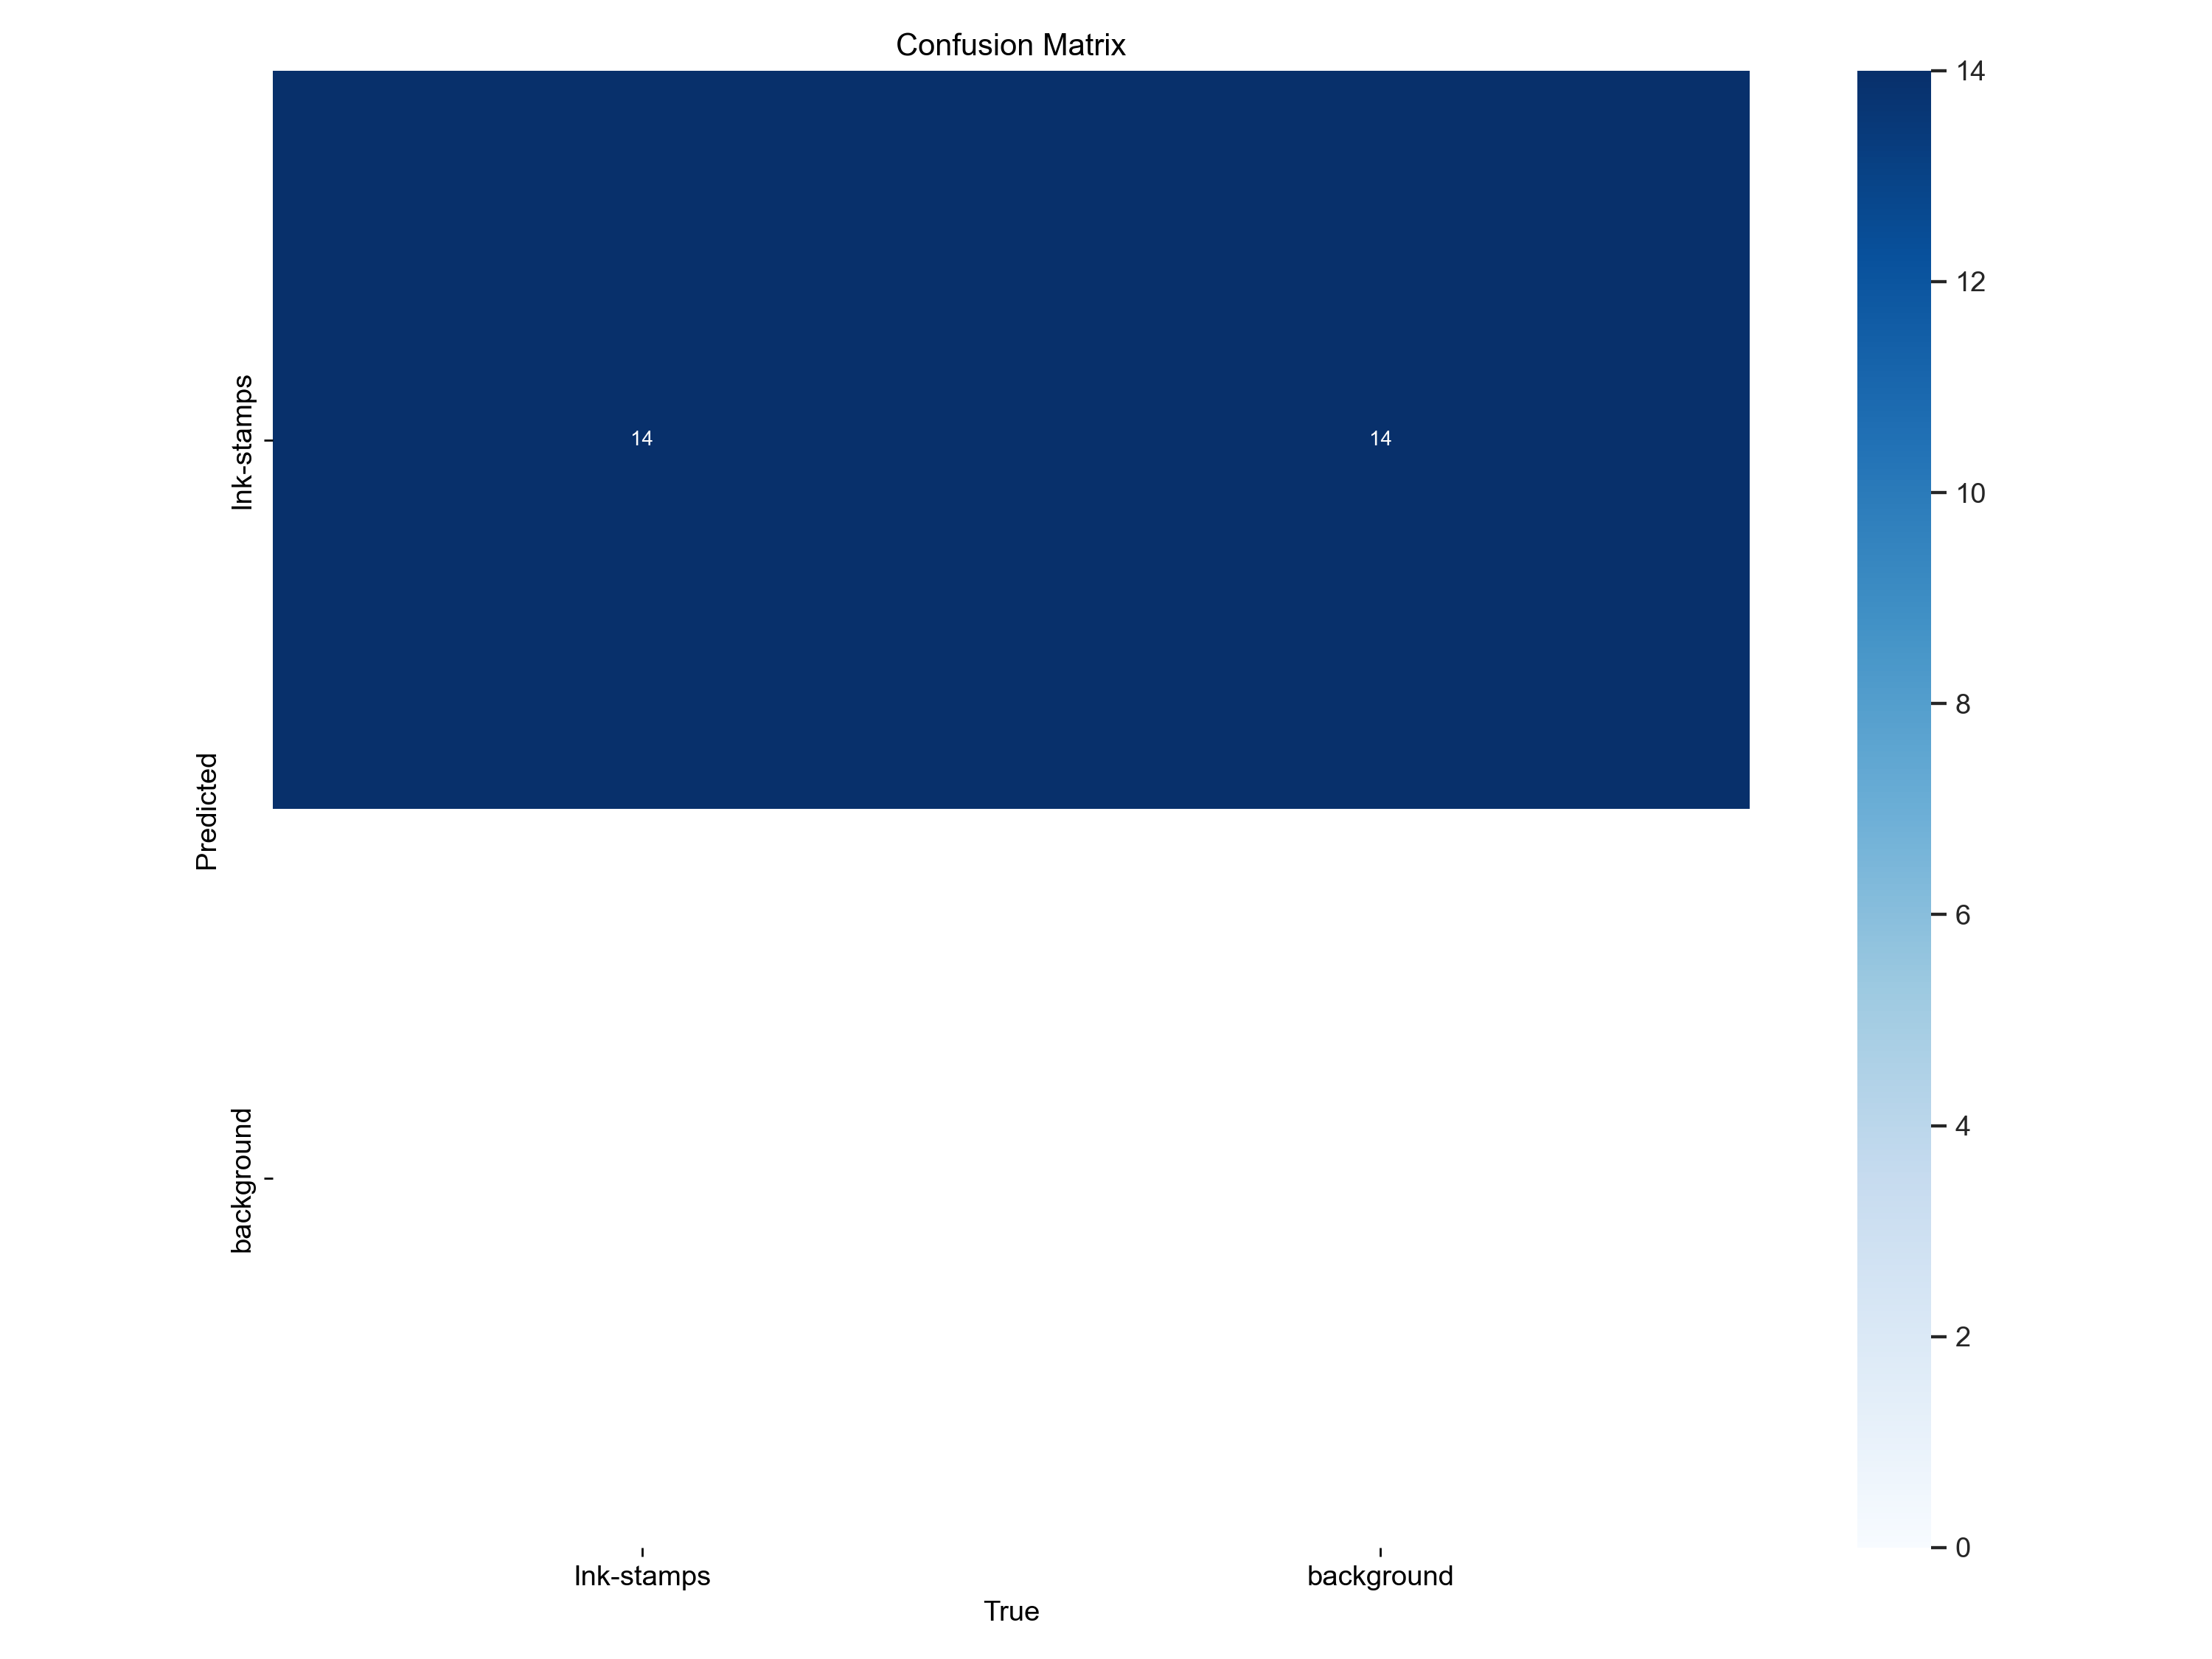

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


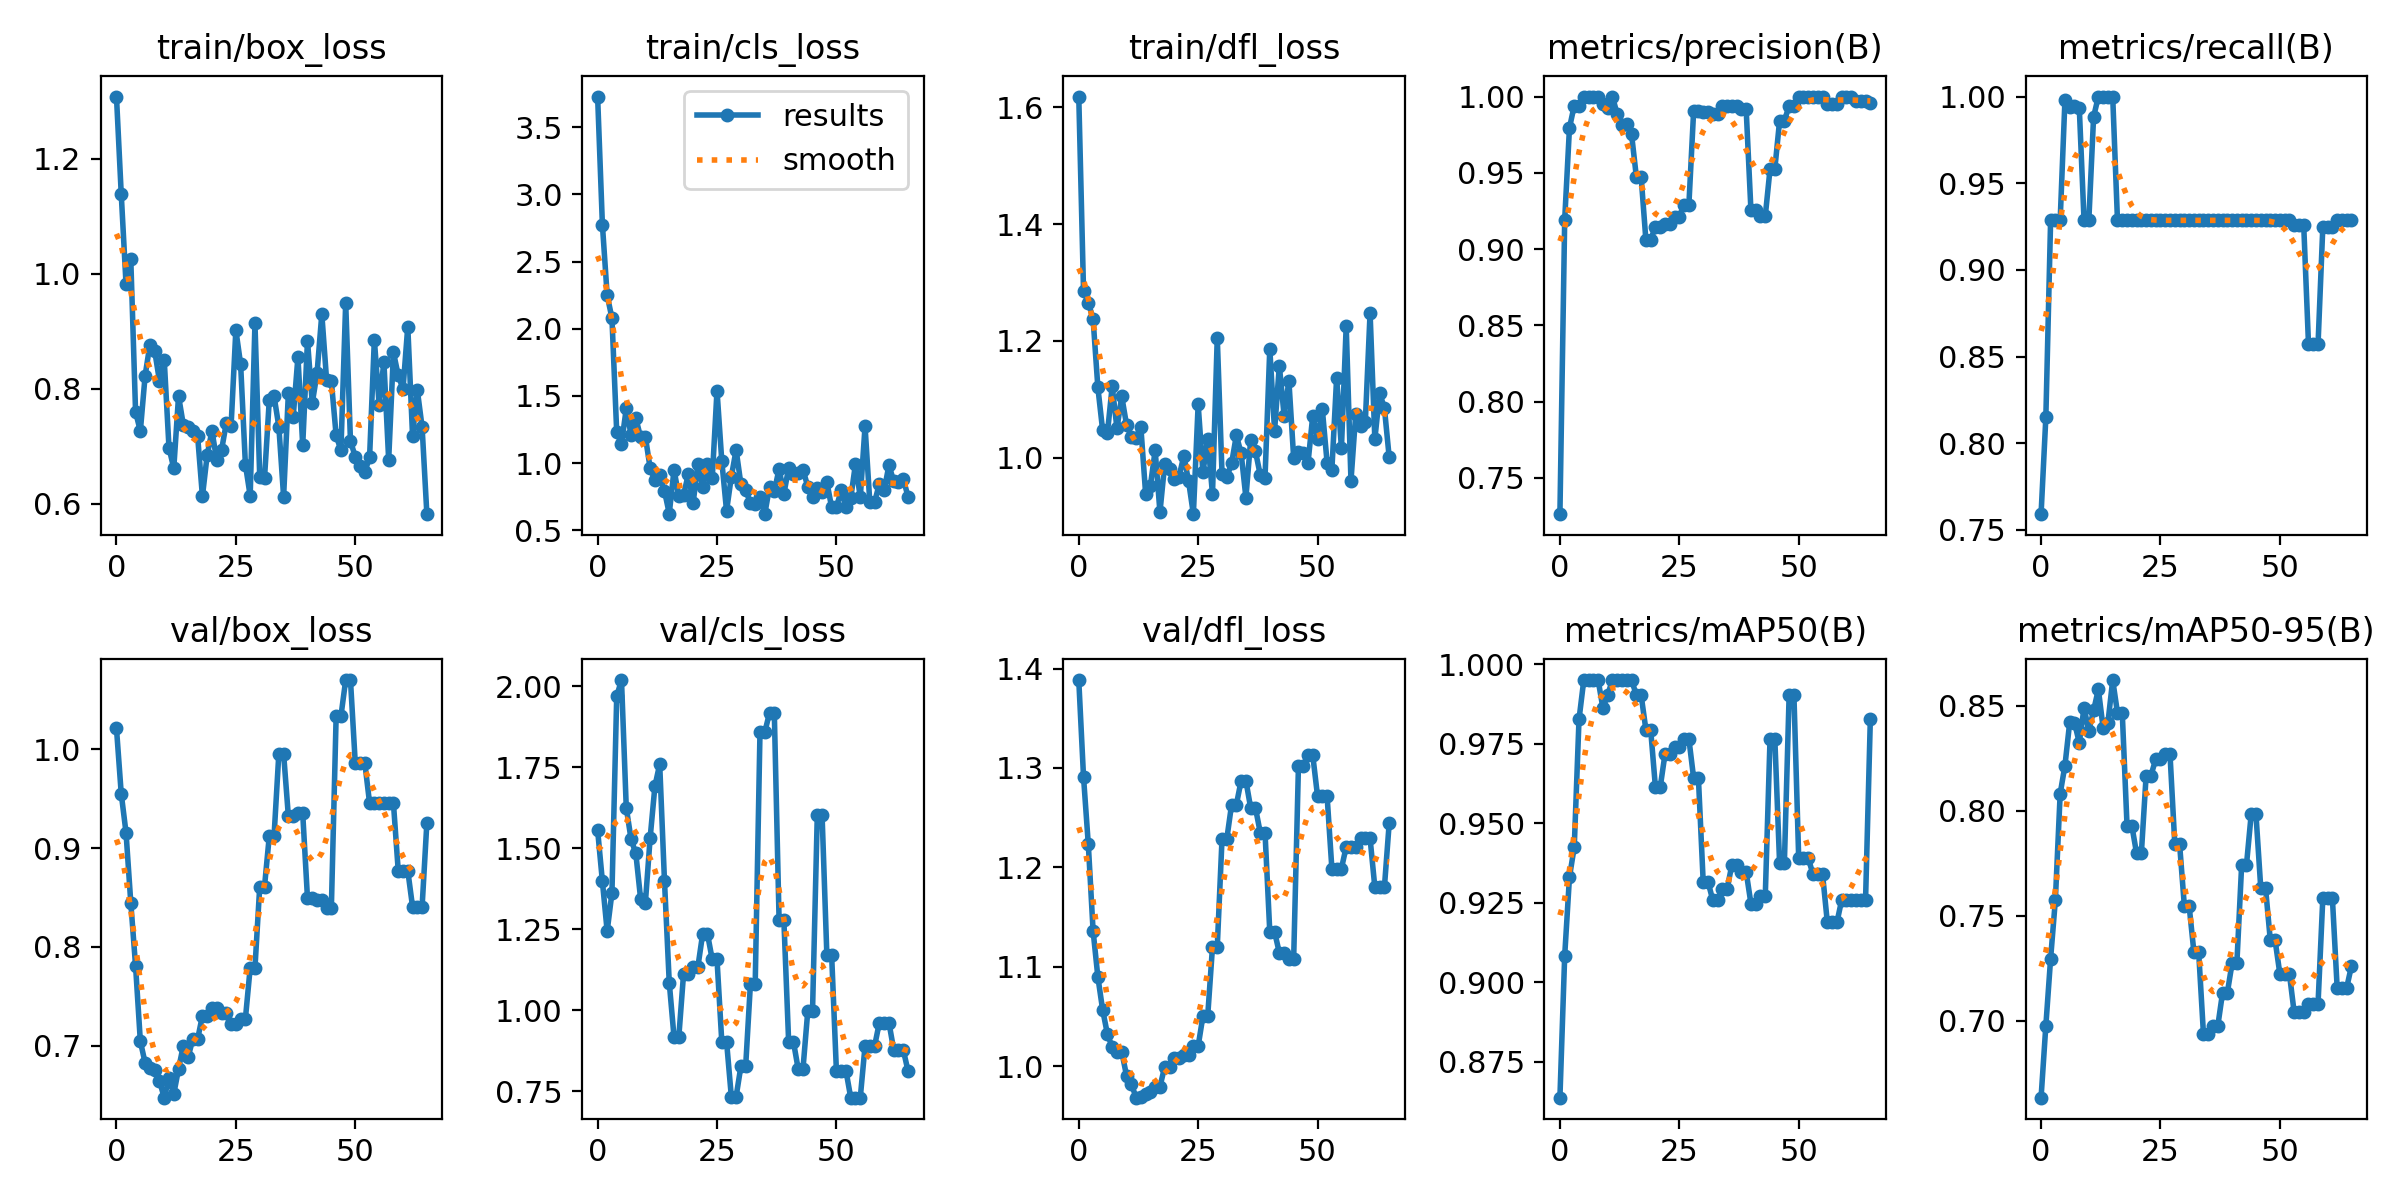

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


Ultralytics YOLOv8.0.134  Python-3.11.3 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning D:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData\datasets\Ink-Stamp-detector-3\valid\labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
val: Scanning D:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData\datasets\Ink-Stamp-detector-3\valid\labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                   all          2         14      0.974    

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


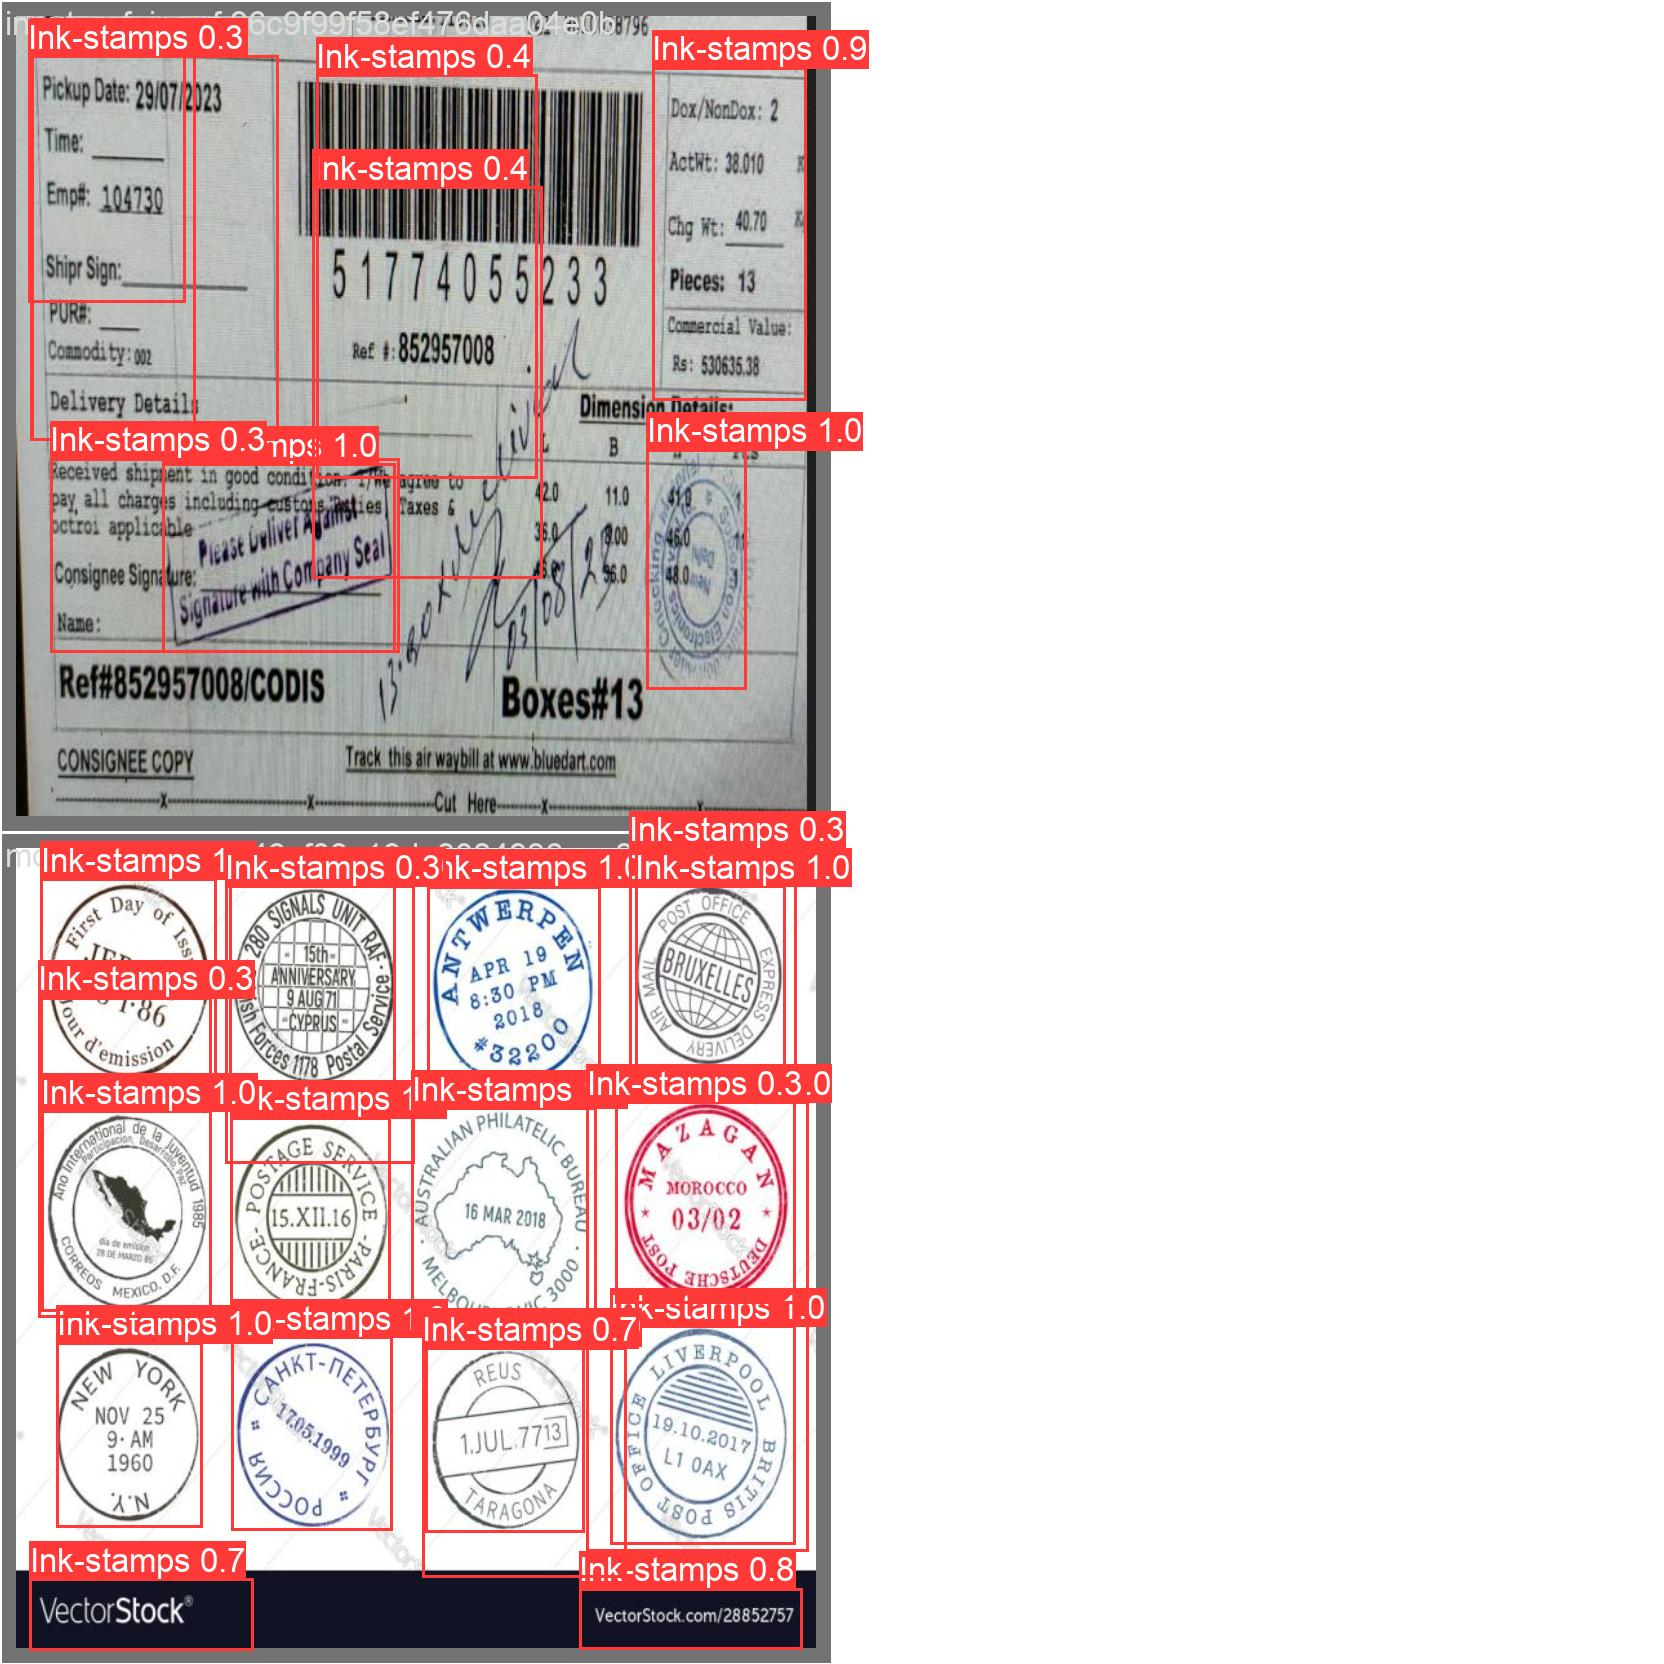

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData


Ultralytics YOLOv8.0.134  Python-3.11.3 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 d:\3.projects_by_tech\Python\STAMP_SEARCH_TEST\NewTestData\datasets\Ink-Stamp-detector-3\test\images\images_jpg.rf.a305f719ed45f5564242229a4ce56ced.jpg: 800x800 23 Ink-stampss, 388.0ms
Speed: 5.1ms preprocess, 388.0ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs\detect\predict


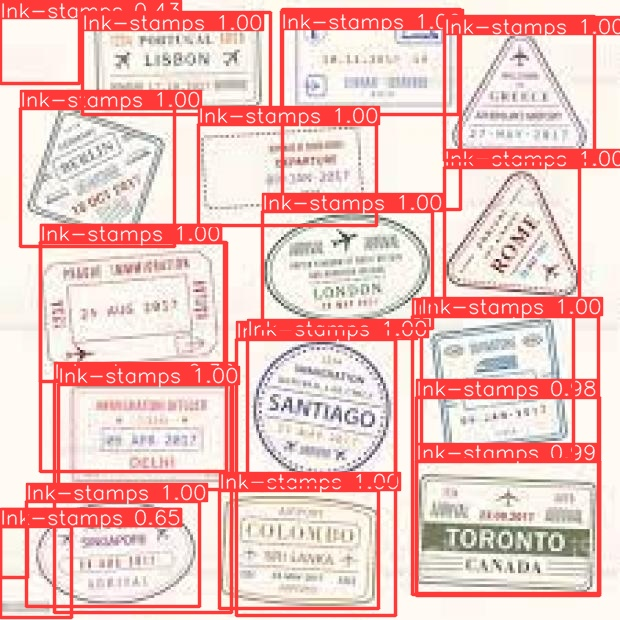

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [3]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

NameError: name 'project' is not defined